In [ ]:
# multimedia analytics

import pandas as pd

file_path = 'https://raw.githubusercontent.com/jingjayy/PDS202207/main/dataset_Facebook.csv'

# Load the dataset with the correct delimiter
dt = pd.read_csv(file_path, delimiter=';')
df = pd.DataFrame(dt)

print(df)

     Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0              139441   Photo         2          12             4          3   
1              139441  Status         2          12             3         10   
2              139441   Photo         3          12             3          3   
3              139441   Photo         2          12             2         10   
4              139441   Photo         2          12             2          3   
..                ...     ...       ...         ...           ...        ...   
495             85093   Photo         3           1             7          2   
496             81370   Photo         2           1             5          8   
497             81370   Photo         1           1             5          2   
498             81370   Photo         3           1             4         11   
499             81370   Photo         2           1             4          4   

     Paid  Lifetime Post Total Reach  L

In [ ]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [ ]:
# Descriptive statistics for numerical columns
print(df.describe())

# Frequency distribution for categorical columns
for col in df.select_dtypes(include=['object']):
  print(df[col].value_counts())

# Correlation matrix for numerical columns only
print(df.corr(numeric_only=True)) # Add numeric_only=True to only calculate correlation for numerical columns

       Page total likes    Category  Post Month  Post Weekday   Post Hour  \
count        500.000000  500.000000  500.000000    500.000000  500.000000   
mean      123194.176000    1.880000    7.038000      4.150000    7.840000   
std        16272.813214    0.852675    3.307936      2.030701    4.368589   
min        81370.000000    1.000000    1.000000      1.000000    1.000000   
25%       112676.000000    1.000000    4.000000      2.000000    3.000000   
50%       129600.000000    2.000000    7.000000      4.000000    9.000000   
75%       136393.000000    3.000000   10.000000      6.000000   11.000000   
max       139441.000000    3.000000   12.000000      7.000000   23.000000   

             Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
count  499.000000                  500.00000                     5.000000e+02   
mean     0.278557                13903.36000                     2.958595e+04   
std      0.448739                22740.78789                   

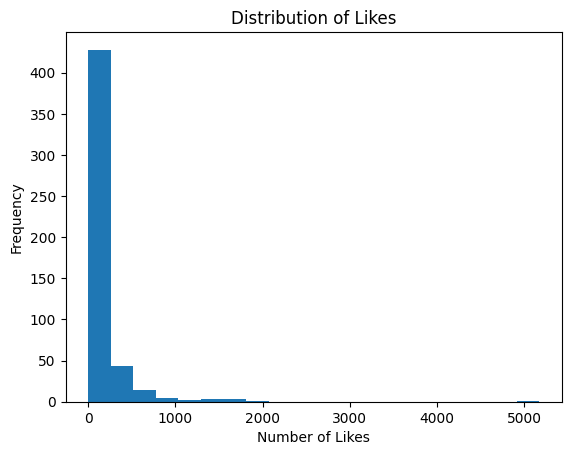

In [ ]:
# Handling missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Replace missing numerical values with mean

# Feature engineering (example: creating a new feature)
df['TotalInteractions'] = df['like'] + df['share'] + df['comment']

# Data visualization (example: histogram of likes)
import matplotlib.pyplot as plt
plt.hist(df['like'], bins=20)
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

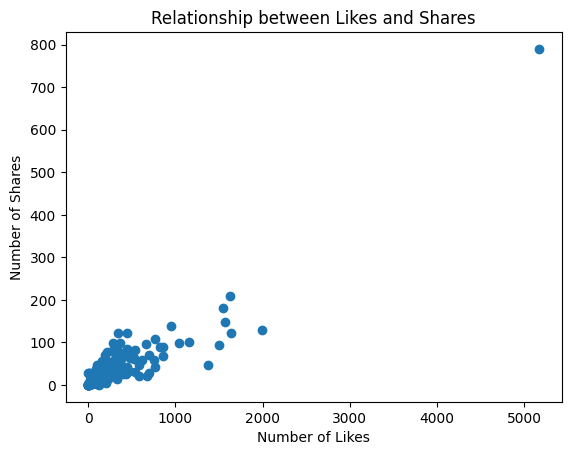

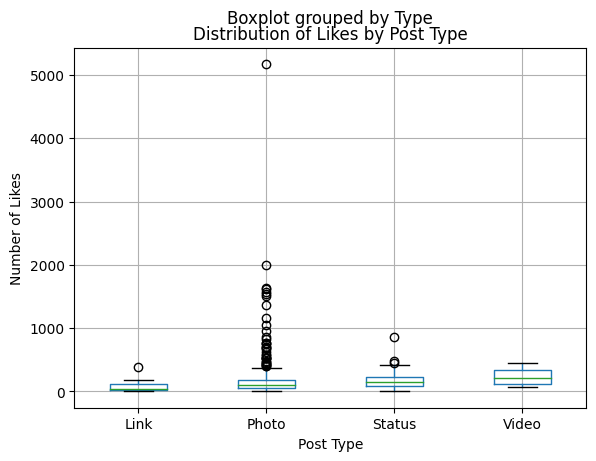

In [ ]:
# Scatter plot of likes vs. shares
plt.scatter(df['like'], df['share'])
plt.xlabel('Number of Likes')
plt.ylabel('Number of Shares')
plt.title('Relationship between Likes and Shares')
plt.show()

# Box plot of likes by post type
df.boxplot(column='like', by='Type')
plt.xlabel('Post Type')
plt.ylabel('Number of Likes')
plt.title('Distribution of Likes by Post Type')
plt.show()

In [ ]:
df['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [ ]:
Type_category = ['Type']


for column in Type_category:
  df[column] = df[column].map({"Photo": 0, "Status": 1, "Link": 2, "Video": 3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    int64  
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 500 non-null    float64
 7   Lifetime

<Axes: >

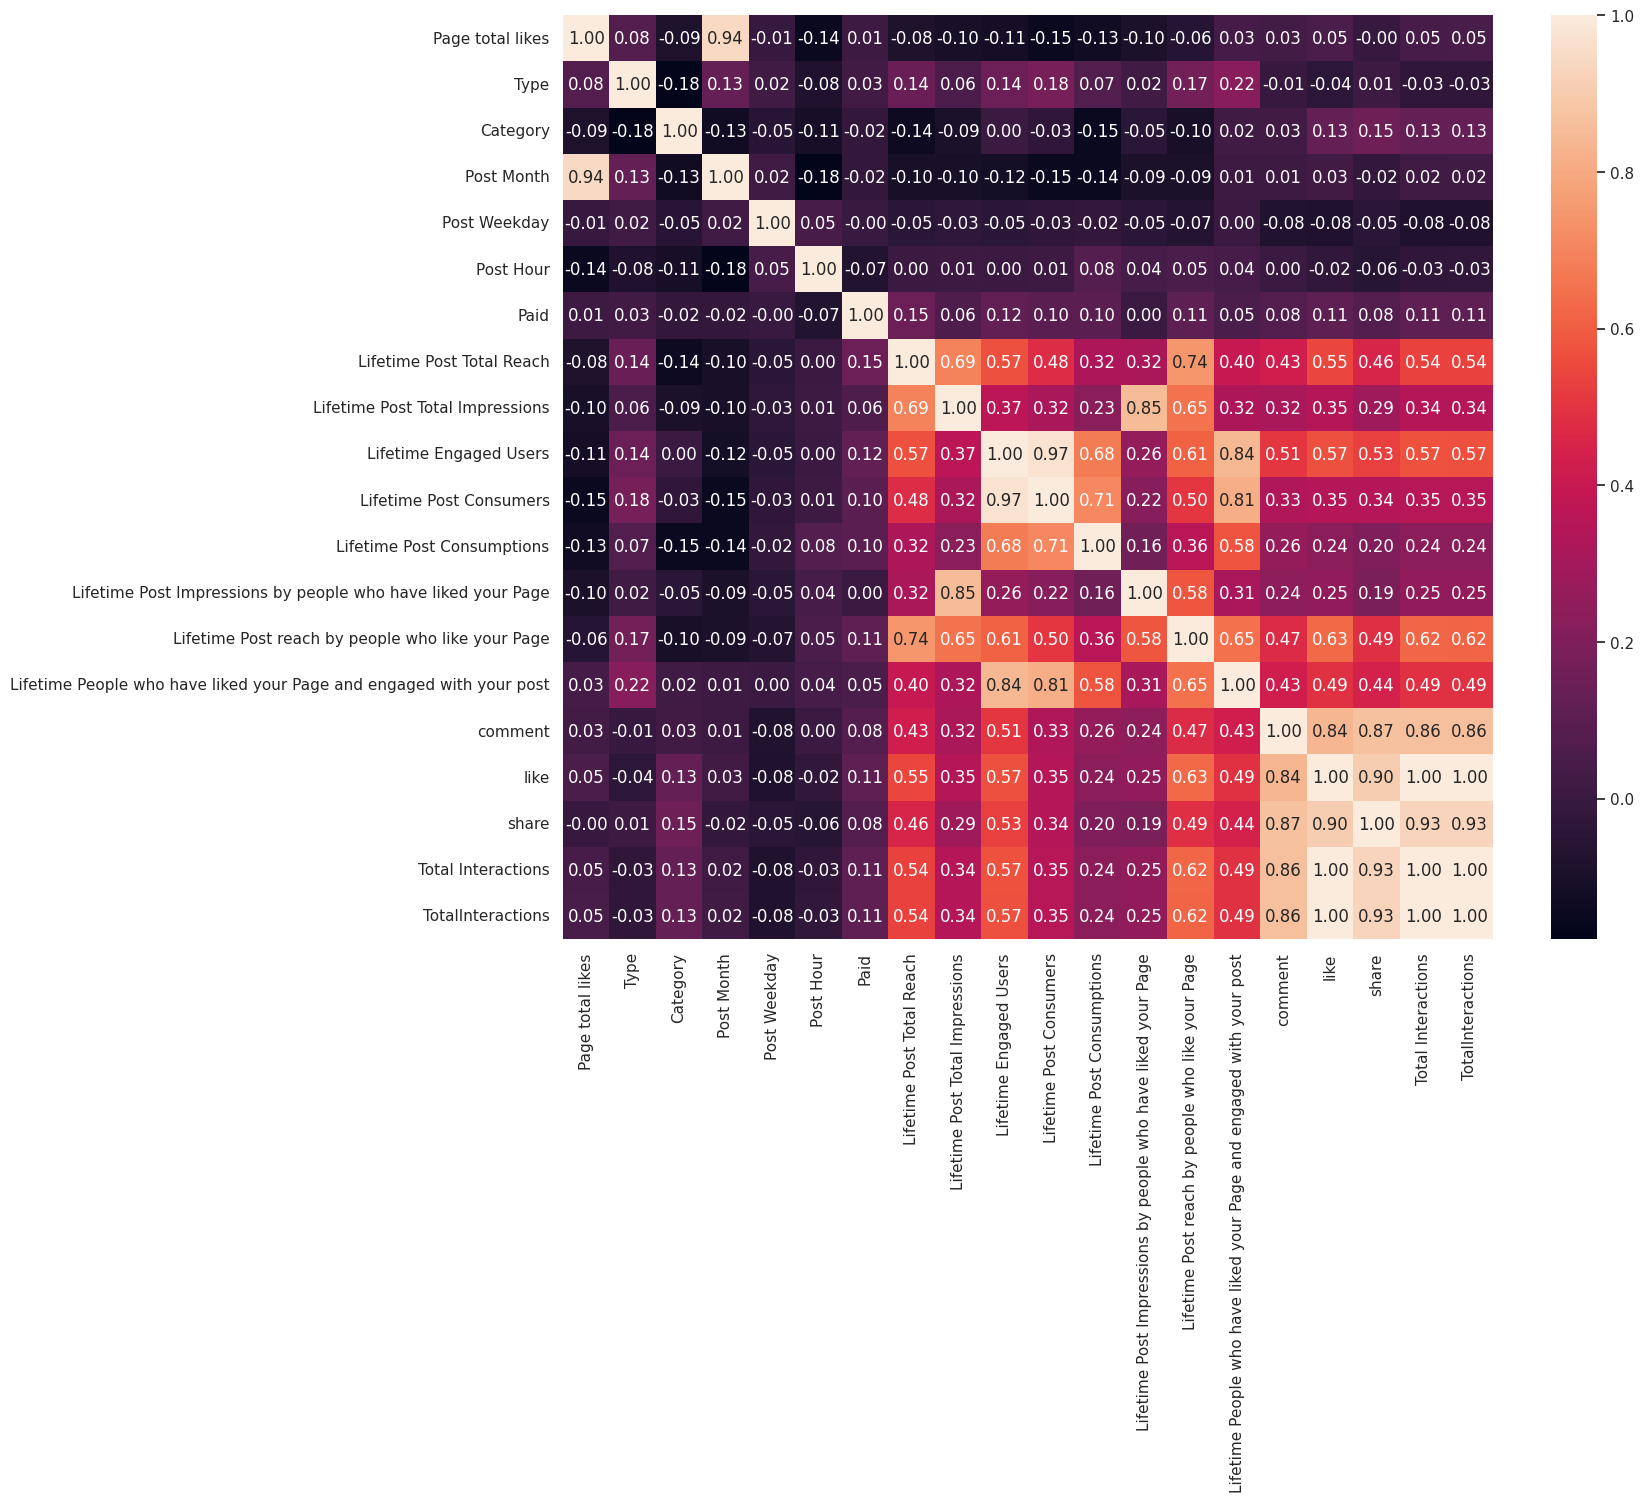

In [ ]:
import seaborn as sns
sns.set(rc ={'figure.figsize' :(15,12)})

corr = df.corr()
sns.heatmap(corr, annot=True,  fmt=".2f")

<Axes: xlabel='Post Hour', ylabel='count'>

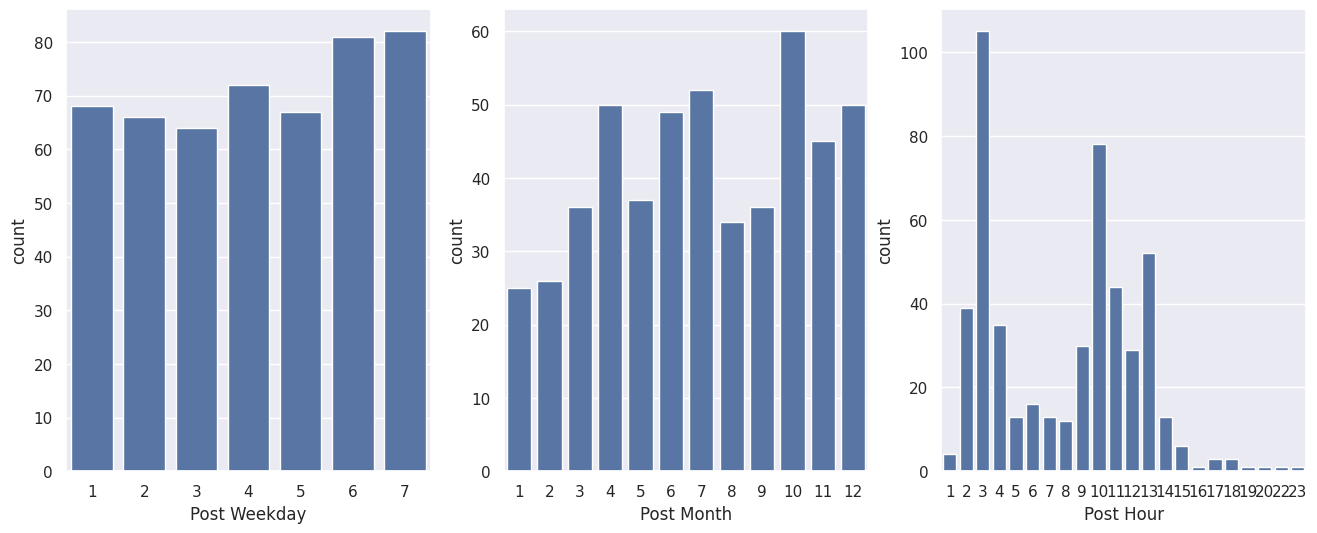

In [ ]:
main, subplots = plt.subplots(1,3, figsize=(16,6))
sns.countplot(data=df, x="Post Weekday",  ax=subplots[0])
sns.countplot(data=df, x="Post Month", ax=subplots[1])
sns.countplot(data=df, x="Post Hour", ax=subplots[2])

<Axes: xlabel='Type', ylabel='Lifetime Engaged Users'>

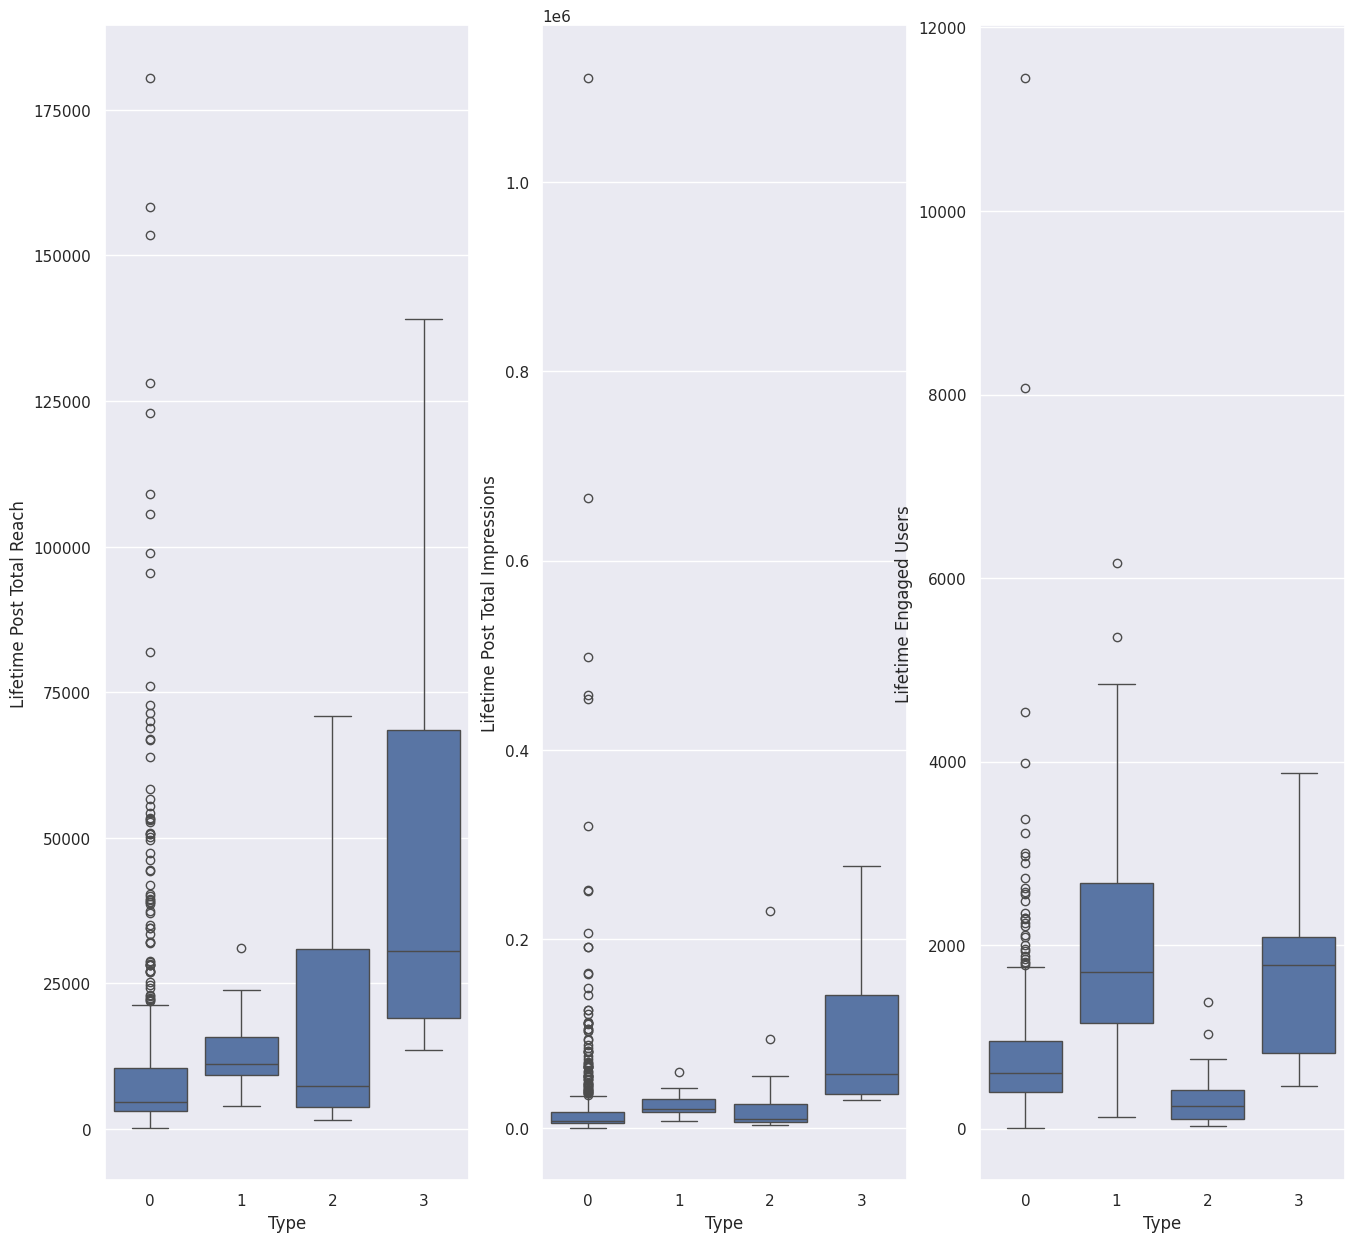

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,15))
sns.boxplot(data=df, y="Lifetime Post Total Reach", x="Type", ax=subplots[0])
sns.boxplot(data=df, y="Lifetime Post Total Impressions", x="Type", ax=subplots[1])
sns.boxplot(data=df, y="Lifetime Engaged Users", x="Type", ax=subplots[2])

<Axes: xlabel='Type', ylabel='Lifetime People who have liked your Page and engaged with your post'>

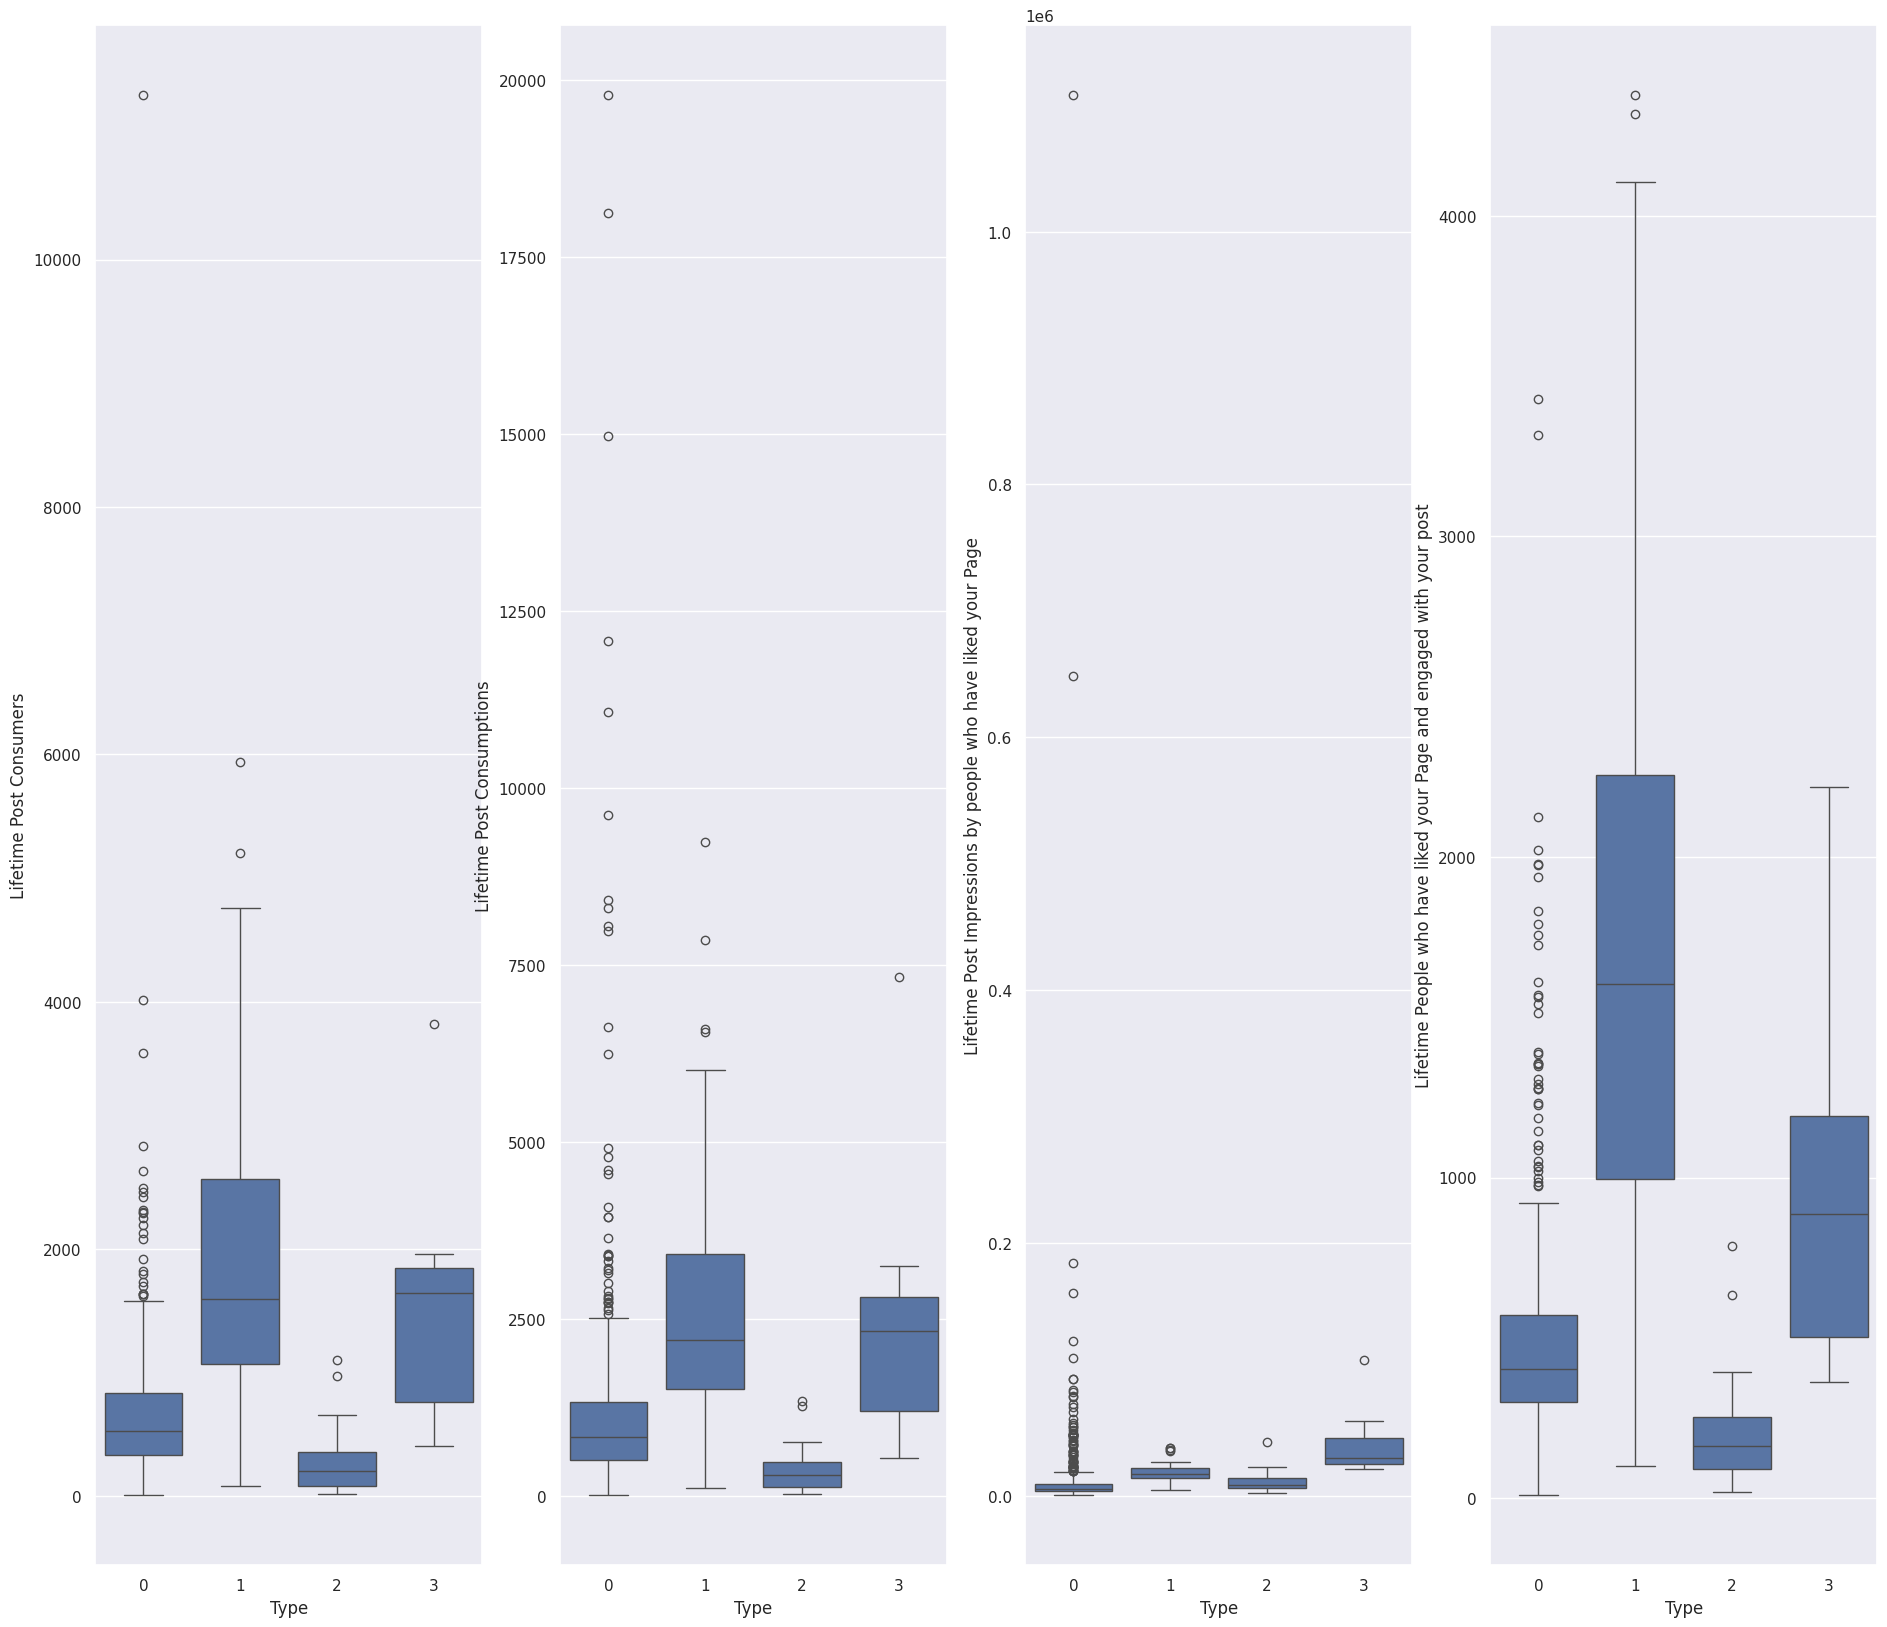

In [ ]:
 main, subplots = plt.subplots(1, 4, figsize=(23,20))
sns.boxplot(data=df, y="Lifetime Post Consumers", x="Type", ax=subplots[0])
sns.boxplot(data=df, y="Lifetime Post Consumptions", x="Type", ax=subplots[1])
sns.boxplot(data=df, y="Lifetime Post Impressions by people who have liked your Page", x="Type", ax=subplots[2])
sns.boxplot(data=df, y="Lifetime People who have liked your Page and engaged with your post", x="Type", ax=subplots[3])